In [1]:
import os
import random

import pandas as pd
from bertopic import BERTopic
from nltk.tokenize import word_tokenize
from utils.filemanagement import load_from_file
from utils.filemanagement import get_project_root
from utils.config import random_sample,seed

In [2]:
model_type="bertopic"
model_name="BERTopic"
experiment="embedding"
embedding_model = "TWE-nb-sbert-base"
data_type="np_mini_stopwords"
file_name_data = f"{data_type}.csv"
file_name = f"{model_type}_{embedding_model}_{data_type}"
folder_path_topics = f"preprocessed_data/results/embedding/{model_type}"
folder_path_data =f"preprocessed_data"
df = load_from_file(folder_path_data,file_name_data)
TOPN = 20
folder_path_word_cloud = f"preprocessed_data/wordclouds/{experiment}/{model_type}/{file_name}"

folder_name = f"Embedding-experiment/models/{model_type}"

ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)


In [3]:
data = df.text.values.tolist()
timestamps = df.date.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))

In [4]:
from flair.embeddings import TransformerWordEmbeddings

emb_model = TransformerWordEmbeddings('NbAiLab/nb-sbert-base')

In [5]:
topic_model = BERTopic(embedding_model=emb_model,verbose=True)
try:
    topic_model = topic_model.load(file_path)
except:
    print("correctly")
    topics,probs = topic_model.fit_transform(documents=new_data)

In [6]:
topic_model.get_topic_info()

Topic  Count                                               Name
0      -1    882  -1_representanten_statsråden_fremskrittspartie...
1       0    426        0_norge_fremskrittspartiet_land_regjeringen
2       1    303                    1_skolen_skole_utdanning_elever
3       2    184                      2_kr_bompenger_statsråden_vei
4       3    162              3_stortinget_statsråden_saken_forslag
5       4    131     4_helseministeren_sykehus_pasienter_pasientene
6       5    101  5_norge_flyktninger_asylsøkere_fremskrittspartiet
7       6     98        6_gasskraftverk_energi_regjeringen_fornybar
8       7     89             7_kommunene_kommuner_kommunane_kommune
9       8     88      8_mat_landbruk_landbruket_landbruksministeren
10      9     73  9_arbeidslivet_jobb_pensjonsreformen_pensjonis...
11     10     65                    10_barn_barnevernet_barna_barns
12     11     61        11_fisken_fisk_statsråden_fiskeriministeren
13     12     58  12_forsvaret_forsvarsministeren_statsråden_for...
14     13     57              13_klimaforliket_2020_utslippene_tonn
15     14     56  14_finansministeren_økonomi_sentralbanksjefen_...
16     15     54                  15_bistand_land_bistanden_fattige
17     16     44  16_folkeparti_kristelig_fremskrittspartiet_arb...
18     17     44         17_barnevernet_barn_barnehagene_barnehager
19     18     43  18_skatt_finansministeren_formuesskatten_skatt...
20     19     41                             19_rovdyr_ulv_dyr_jerv
21     20     40             20_statkraft_eierskap_selskapet_staten
22     21     40      21_politiet_politi_politiets_justisministeren
23     22     35                        22_nrk_reklame_monopol_kino
24     23     35        23_kultur_kulturen_kulturministeren_museene
25     24     33  24_miljøvernministeren_statsråden_skogen_bioen...
26     25     30                25_irak_krig_utenriksministeren_usa
27     26     30                26_utmark_lokale_motsegn_statsråden
28     27     27                     27_far_foreldrene_fedre_barnet
29     28     25  28_boliger_husbanken_boligmarkedet_boligbyggingen
30     29     22                29_biler_avgiftene_avgifter_bilpark
31     30     21                  30_alkohol_øl_vin_alkoholpolitikk
32     31     21      31_næringen_skipsfarten_næringslivet_maskinar
33     32     20  32_offentlig_skattedirektoratet_regjeringen_st...
34     33     20          33_fengsel_innsatte_fengslene_soningskøen
35     34     20  34_oljevernberedskap_ulykken_slepebåtberedskap...
36     35     18                 35_nato_natos_militære_operasjoner
37     36     14  36_vegne_stortingsrepresentantene_representant...
38     37     14                37_afghanistan_militære_krig_krigen
39     38     14           38_fattige_regjeringen_fattigste_sosiale
40     39     13  39_personvernet_personvern_datalagringsdirekti...
41     40     13                      40_menn_vold_voldtekt_gjelder
42     41     12                41_aetat_etatene_sørge_trygdeetaten
43     42     12      42_industri_industrien_konkurranseutsatt_nord
44     43     11         43_sosialministeren_transporten_nav_tolker

In [7]:
topics = topic_model.get_topics()

In [8]:
topic_model.visualize_topics()

In [9]:
erk = topic_model.get_representative_docs(0)

In [10]:
print(erk)

['takke komiteen samarbeid budsjettet rette spesiell takk kristelig folkeparti venstre budsjettforliket stortinget styrke utdannings forskningsbudsjettet regjeringens hovedprosjekter videreutvikle kunnskapssamfunnet kunnskap gir framtidsmuligheter bakgrunn grunnlaget sosial mobilitet samfunnet kunnskap avgjørende styrke konkurransekraft bygge landet framtiden budsjettet regjeringens ambisjoner historisk satsing skolen utdanningsinstitusjonene studentene forskningsmiljøene ingenting elevenes læring lærerens kompetanse evne lære fremskrittspartiet glad regjeringen fortsetter satsingen videreutdanning lærerne satsingen sikrer totalt 5 050 lærere 500 skoleledere tilbud videreutdanning strategien kompetanse kvalitet høsten 2015 trygg satsingen målbare resultater arbeider lærere skolen kompetanse undervise faget underviser fremskrittspartiet positiv budsjettforliket bevilget 50 mill kr kompetanseløft ufaglærte jobb skolen tiltak kvalifisere yrket tidlig innsats tiltakene lykkes skolen ivaret

In [11]:
for item in erk:
    print(len(item))

6040
5241
8081


In [12]:
ark = "først vil jeg takke komiteen for et godt samarbeid om budsjettet. jeg vil rette en spesiell takk til kristelig folkeparti og venstre, som gjennom budsjettforliket her på stortinget har vært med på å styrke utdannings- og forskningsbudsjettet ytterligere. et av regjeringens hovedprosjekter er å videreutvikle kunnskapssamfunnet, dette fordi kunnskap gir framtidsmuligheter for den enkelte, uansett bakgrunn, og danner grunnlaget for sosial mobilitet i samfunnet. kunnskap er avgjørende for å styrke norsk konkurransekraft og for å bygge landet for framtiden. dette budsjettet følger opp regjeringens ambisjoner gjennom en historisk satsing på skolen, utdanningsinstitusjonene, studentene og forskningsmiljøene. ingenting betyr mer for elevenes læring enn lærerens kompetanse og evne til å lære bort. fremskrittspartiet er glad for at regjeringen fortsetter den store satsingen på videreutdanning av lærerne. satsingen sikrer at totalt 5 050 lærere og 500 skoleledere får tilbud om videreutdanning innen strategien kompetanse for kvalitet fra høsten 2015. jeg er trygg på at den satsingen vil gi målbare resultater. det arbeider i dag mange lærere i den norske skolen som ikke har kompetanse til å undervise i det faget de underviser i. fremskrittspartiet er derfor positiv til at det i budsjettforliket ble bevilget 50 mill. kr til et kompetanseløft for ufaglærte med jobb i skolen. vi ser på dette som et godt tiltak for at flere kan kvalifisere seg til yrket. tidlig innsats er et av de viktigste tiltakene for at flere skal lykkes i skolen. for å ivareta tidlig innsats ble det i budsjettforliket satt av 200 mill. kr til å styrke lærertettheten i 1.–4. klasse fra høsten 2015. det er en forutsetning at stillingene skal besettes av lærere med formell kompetanse. fremskrittspartiet forventer at dette vil forsterke trykket på tidlig innsats og individuell tilpasning. internasjonale undersøkelser viser at norske elever presterer under eller om lag på gjennomsnittet for oecd i både matematikk og naturfag. matematikk er det faget flest elever får karakter 1 og 2 i på ungdomsskolen, og som flest elever stryker i på videregående skole. dette tyder på at vi har et realfagsproblem i skolen. gode realfagskunnskaper har bidratt til at norge bl.a. er verdensledende innen maritim sektor, olje og gass. fremskrittspartiet mener at behovet for realfagskunnskaper vil være av vital betydning for det som vi også skal leve av i framtiden. fremskrittspartiet er positiv til at regjeringen er på gang med en ny realfagsstrategi i 2015. strategien innebærer bl.a. oppretting av realfagskommuner og har til hensikt å stimulere kommuner til å ta helhetlig ansvar for å forbedre realfagskunnskapene til barn og unge. ekspertgruppen for realfag som departementet opprettet, har nå levert sin rapport og kommet med en mengde konkrete forslag til hvordan elevene skal bli bedre i matematikk og naturfag. samarbeidsavtalen mellom regjeringspartiene og kristelig folkeparti og venstre viderefører regjeringens satsing på yrkesfagløftet, som ble startet i 2014. avtalen gjør at lærlingtilskuddet økes til 7 500 kr totalt per lærekontrakt. før fremskrittspartiet tiltrådte regjeringskontorene, hadde dette tilskuddet stått på stedet hvil i fem år. ssb-prognoser viser at vi vil mangle ca. 134 000 fagarbeidere i 2030. regjeringens yrkesfagløft, som startet i 2014, innebar styrking av praksisbrevordningen, vekslingsmodellen, hospiteringsordningen for lærerne, tilskudd til nye lærebedrifter og yrkesretting av fellesfag. disse tilbudene videreføres neste år. i tillegg videreføres ordningen med at yrkesfaglærere kan hospitere i bedrift, og at folk fra yrkeslivet kan hospitere i skolen. det er bevilget 8 mill. kr til kompetanseheving for yrkesfaglærere i budsjettet for 2015. dette er en ny og viktig satsing. for at elevene på videregående yrkesfag skal få fullføre sin utdanning i bedrift, er det behov for langt flere læreplasser. den foreslåtte økningen i lærlingtilskuddet vil forhåpentligvis gi flere plasser, men fremskrittspartiet er opptatt av å minne om at statsråden nøye må følge opp den inngåtte samfunnskontrakten slik at forpliktelsen til å øke antall læreplasser blir innfridd. jeg må også legge til at fremskrittspartiet har forventninger om en enda større satsing på yrkesfagløftet neste år. mennesker er norges viktigste ressurs, og den menneskelige kapitalen utgjør ca. 80 pst. av nasjonalformuen. av ulike grunner må mange skifte yrke, innholdet i etablerte yrker endres, og stadig utvikling av nye arbeidsmetoder krever at mange må tilegne seg nye ferdigheter i voksen alder. fremskrittspartiet mener at det er stort behov for gode og oversiktlige utdanningstilbud til voksne. derfor er fremskrittspartiet svært positiv til at regjeringen har satt i gang en rekke tiltak som vil styrke voksnes læring, bl.a. ved å utarbeide en rettleder for realkompetansevurdering ved opptak til fagskoler og til realkompetansevurdering for fritak til høyere utdanning. den har satt i gang lokale tilbud om etterutdanning for lærere og andre som underviser i voksenopplæringen. det foreslås å utvikle et kartleggingsverktøy som har til hensikt å øke voksnes deltaking i og gjennomføring av opplæring, og å gjøre opplæringstilbyderne i stand til å gi bedre tilpasset og tilrettelagt opplæring. det skal også utvikles et helhetlig system for karriereveiledning for voksne. regjeringen legger med dette budsjettet fram en sterkere satsing på høyere utdanning og på studentvelferd enn i noe tidligere statsbudsjett. regjeringen øker studiefinansieringen med 3,1 pst., noe som er godt over forventet prisvekst. i budsjettforliket legger vi opp til bygging av 2 000 hybelenheter i 2015. det er så mye som en dobling sammenlignet med de rød-grønnes siste budsjett. videre blir frikortgrensen økt fra 40 000 til 50 000 kr, noe som kommer våre studenter til gode. alt i alt legger regjeringens budsjett opp til at studentene kan bruke mer tid på studiene. fremskrittspartiet mener det er samfunnsøkonomisk klokt. høyre–fremskrittsparti-regjeringen la sammen med budsjettet fram meld. st. 7 for 2014–2015, langtidsplan for forskning og høyere utdanning 2015–2024. planen inneholder en rekke store og forpliktende opptrappinger over tid, men startskuddet går allerede i 2015. regjeringen bevilger 100 mill. kr til å utvikle flere verdensledende fagmiljøer. eu er vår største forskningspartner, og vi har i dag verdens største forskningssamarbeid gjennom horisont 2020. det er viktig for norge å delta i de store forskningssamarbeidene, bl.a. for å få tilgang til sterke fagmiljøer og kontakt med verdensledende forskere. i dag klarer vi ikke å tilbakeføre en tilfredsstillende andel av midlene vi bidrar med inn i prosjektet. derfor er jeg fornøyd med at regjeringen bevilger 115 mill. kr til stimuleringsordninger, deriblant gjennom stim-eu, for å legge til rette for større deltagelse i horisont 2020. budsjettforliket, som regjeringspartiene har inngått med kristelig folkeparti og venstre, viderefører de viktigste satsingene i regjeringens forslag til statsbudsjett for 2015, og trygger dermed vekst og verdiskaping i hele landet. budsjettforliket resulterte bl.a. i 100 nye rekrutteringsstillinger utover regjeringens forslag til statsbudsjett. dette gir sektoren nærmere 150 nye rekrutteringsstillinger neste år. fremskrittspartiet er godt fornøyd med at det blir lagt til rette for økt forskningsinnsats ved norske utdanningsinstitusjoner. regjeringens kunnskapssatsing er viktig for å gi alle muligheter til aktiv deltagelse i samfunnet, men også for å styrke vår konkurransekraft. konkurransen om kunnskapen er global, og vi konkurrerer i realiteten mot alle andre verdens land. norge kan aldri konkurrere mot lavkostland på pris, men vi kan konkurrere på smarte løsninger og god kvalitet. ifølge nifu har offentlige bevilgninger til forskning aldri tidligere utgjort en høyere andel av bruttonasjonalproduktet. dette budsjettet viser med all tydelighet at regjeringen og stortingsflertallet prioriterer å satse på utdanning og forskning. det gleder fremskrittspartiet, og det ruster landet for framtiden. tro, religion og livssyn spiller en viktig rolle i det norske samfunnet, både for fellesskapet og for enkeltmennesker, og den norske kirke står sterkt i befolkningen. fremskrittspartiet ser fram til at den norske kirke skal bli et eget rettssubjekt og på lik linje med andre trossamfunn få være herre i eget hus. kirkebyggene våre er blant de viktigste historiske bygningene norge har, og for fremskrittspartiet er det av stor betydning at disse sikres og ivaretas på en best mulig måte. fremskrittspartiet er derfor glad for at regjeringspartiene sammen med kristelig folkeparti og venstre styrket bevilgningen til sikring av kirkebygg med 2 mill. kr og ga 1 mill. kr til videreføring av rentekompensasjonsordningen til kirkebygg. dette gir en låneramme på 500 mill. kr. fremskrittspartiet er også glad for at regjeringen følger opp punktet i regjeringsplattformen som viser til at «regjeringen vil bidra til et nasjonalt løft i sikringsarbeidet av fredede og verneverdige kirker»."

In [13]:
ark2 = ark.split(" ")
print(" ".join(ark2[0:205]))

først vil jeg takke komiteen for et godt samarbeid om budsjettet. jeg vil rette en spesiell takk til kristelig folkeparti og venstre, som gjennom budsjettforliket her på stortinget har vært med på å styrke utdannings- og forskningsbudsjettet ytterligere. et av regjeringens hovedprosjekter er å videreutvikle kunnskapssamfunnet, dette fordi kunnskap gir framtidsmuligheter for den enkelte, uansett bakgrunn, og danner grunnlaget for sosial mobilitet i samfunnet. kunnskap er avgjørende for å styrke norsk konkurransekraft og for å bygge landet for framtiden. dette budsjettet følger opp regjeringens ambisjoner gjennom en historisk satsing på skolen, utdanningsinstitusjonene, studentene og forskningsmiljøene. ingenting betyr mer for elevenes læring enn lærerens kompetanse og evne til å lære bort. fremskrittspartiet er glad for at regjeringen fortsetter den store satsingen på videreutdanning av lærerne. satsingen sikrer at totalt 5 050 lærere og 500 skoleledere får tilbud om videreutdanning inn

In [14]:
topic_model.save(file_path,save_embedding_model=False)

In [15]:
topics

{-1: [('representanten', 0.011162963189971349),
  ('statsråden', 0.011131862993028128),
  ('fremskrittspartiet', 0.010068883682587487),
  ('regjeringen', 0.009783467231409626),
  ('gjelder', 0.0097349333265358),
  ('stortinget', 0.00877503307650853),
  ('norge', 0.00780966075199426),
  ('ønsker', 0.007793276221828672),
  ('arbeiderpartiet', 0.007655298921957971),
  ('høyre', 0.007523800937975126)],
 0: [('norge', 0.009652593914319314),
  ('fremskrittspartiet', 0.008052748597172336),
  ('land', 0.007767076104540608),
  ('regjeringen', 0.007743847178818449),
  ('barn', 0.0071774396734012366),
  ('sv', 0.007116717200836951),
  ('kr', 0.006744203539416338),
  ('stortinget', 0.006625526413243015),
  ('pst', 0.006425008689811015),
  ('bedre', 0.006318168726585595)],
 1: [('skolen', 0.023091103163579246),
  ('skole', 0.018630638602371487),
  ('utdanning', 0.016236455312424285),
  ('elever', 0.015574229213518958),
  ('elevene', 0.0146886104744152),
  ('forskning', 0.01335748820894969),
  ('lær

In [16]:
NUM_TOPICS = len(topic_model.topic_sizes_.keys())-1

In [17]:
formatted_topics = [dict(topics[i]) for i in range(NUM_TOPICS)]

In [18]:
print(formatted_topics)

[{'norge': 0.009652593914319314, 'fremskrittspartiet': 0.008052748597172336, 'land': 0.007767076104540608, 'regjeringen': 0.007743847178818449, 'barn': 0.0071774396734012366, 'sv': 0.007116717200836951, 'kr': 0.006744203539416338, 'stortinget': 0.006625526413243015, 'pst': 0.006425008689811015, 'bedre': 0.006318168726585595}, {'skolen': 0.023091103163579246, 'skole': 0.018630638602371487, 'utdanning': 0.016236455312424285, 'elever': 0.015574229213518958, 'elevene': 0.0146886104744152, 'forskning': 0.01335748820894969, 'lærere': 0.012041382941272508, 'videregående': 0.01148601291599346, 'statsråden': 0.011089926515162689, 'gjelder': 0.010659205291488328}, {'kr': 0.01864811600949789, 'bompenger': 0.018159283722818376, 'statsråden': 0.01615197488354199, 'vei': 0.015134434837263636, 'representanten': 0.01509033247648079, 'veier': 0.014505608391909165, 'jernbane': 0.014484077392443546, 'senterpartiet': 0.014337214441571124, 'jernbanen': 0.014275062531604262, 'regjeringen': 0.012023278026520

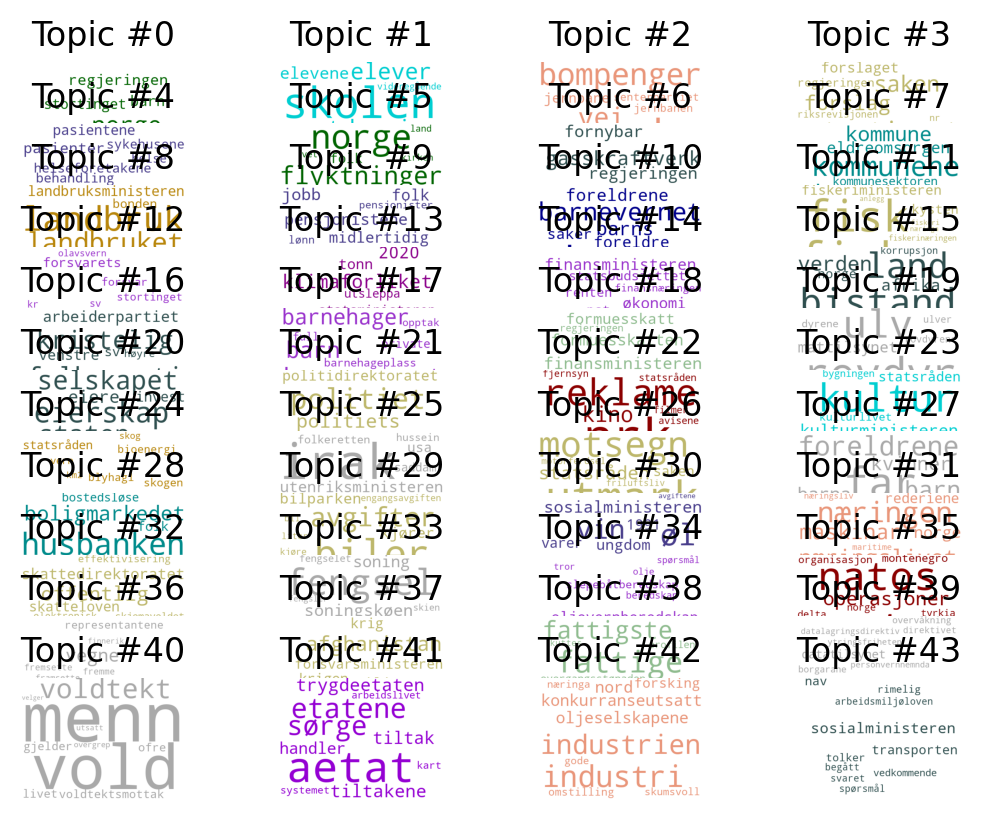

In [19]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(formatted_topics, f"{model_name}-{embedding_model}: {data_type}", NUM_TOPICS, dpi=200)

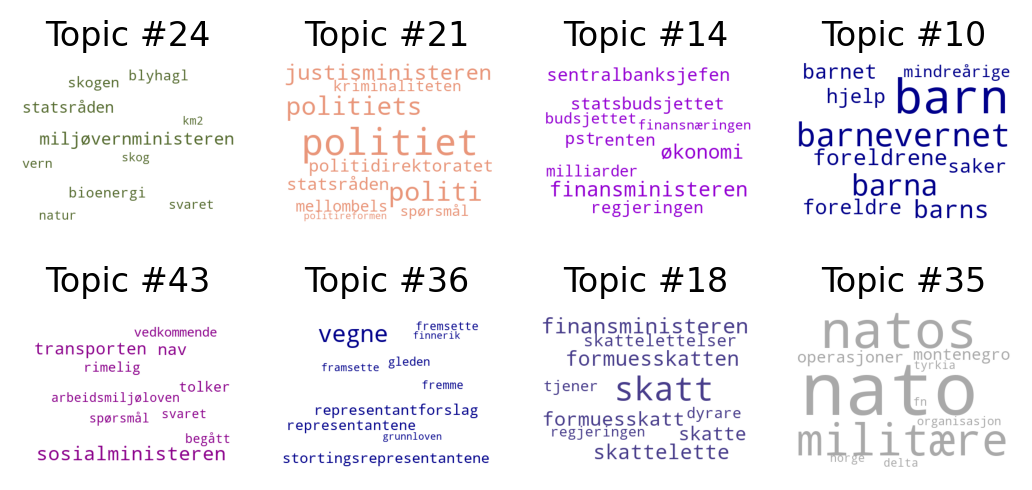

In [20]:
from utils.filemanagement import make_excerpt_wordcloud


excerpt_wordcloud = make_excerpt_wordcloud(formatted_topics,NUM_TOPICS,f"Sample from {model_name}-{embedding_model}: {data_type}",random_sample=random_sample,seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

In [21]:
from utils.tables_and_plots import create_wordcloud


wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(NUM_TOPICS):
    topic_wordcloud = create_wordcloud(dict(topics[i]))
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [22]:
from utils.filemanagement import write_topics_file
topic_words_numbered = []
for i, key in enumerate(topics.keys()):
    if key == -1:
        continue
    r = topics[key]
    rr = []
    for item in r:
        rr.append(item[0])
    topic_words_numbered.append((i,rr))


write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [23]:
from utils.filemanagement import load_model_topics


loaded_topics = load_model_topics(folder_path_topics, file_name)


In [24]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [25]:
from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [26]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [27]:
from utils.stats import compute_metrics

coherence, diversity = compute_metrics(
    loaded_topics.values(), word_frequencies, word_co_frequencies, 10)

10
('fremskrittspartiet', 'norge') wordtuple
('fremskrittspartiet', 'norge') wordup
2181.0 over
3959371.0 under
-10.826065771438381 -11.09077405464075 0.9761325691157141 ('fremskrittspartiet', 'norge') 2181 2017 1963
('land', 'norge') wordtuple
('land', 'norge') wordup
2506.0 over
1809249.0 under
-9.495788844210363 -11.291170699321862 0.8409924087659637 ('land', 'norge') 2506 2017 897
('norge', 'regjeringen') wordtuple
('norge', 'regjeringen') wordup
2675.0 over
4384958.0 under
-10.6788084174644 -11.385323176175872 0.9379451292002079 ('norge', 'regjeringen') 2675 2017 2174
('barn', 'norge') wordtuple
('barn', 'norge') wordup
722.0 over
1799164.0 under
-11.283040241646097 -9.49585502688717 1.1882068765475648 ('barn', 'norge') 722 2017 892
('norge', 'sv') wordtuple
('norge', 'sv') wordup
1165.0 over
2706814.0 under
-11.182050085271504 -10.186114239541643 1.0977738735605105 ('norge', 'sv') 1165 2017 1342
('kr', 'norge') wordtuple
('kr', 'norge') wordup
1238.0 over
2426451.0 under
-10.9366

In [28]:
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.028717778026896214


In [29]:
print(diversity)

0.8159090909090909


In [30]:
print(coherence)

1.632473266884013


In [31]:
from tabulate import tabulate
import csv

In [32]:
# Check the stats for the dataset after running basic pipeline

models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒══════════════════════════════════════════════╤═══════════╤══════════╕
│ Model                                        │ Metric    │    Value │
╞══════════════════════════════════════════════╪═══════════╪══════════╡
│ bertopic_TWE-nb-sbert-base_np_mini_stopwords │ coherence │ 1.63247  │
├──────────────────────────────────────────────┼───────────┼──────────┤
│ bertopic_TWE-nb-sbert-base_np_mini_stopwords │ diversity │ 0.815909 │
╘══════════════════════════════════════════════╧═══════════╧══════════╛


In [33]:
# Save all topic stats to file

topic_stats_folder_path = f"preprocessed_data/metrics/{experiment}/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})